In [1]:
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import healpy as hp

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from delens import Delens

In [4]:
d = Delens.from_ini('../litebird.ini')

In [5]:
fT,fE,fB = d.recon.get_cmb_sim(0)

In [6]:
fT, fQ, fU = hp.alm2map([fT,fE,fB],d.recon.nside)

In [7]:
fElm, fBlm = cs.utils.hp_map2alm_spin(d.recon.nside,d.recon.lmax,d.recon.lmax,2,fQ,fU)

In [22]:
idx = 0
wElm = d.get_wiener_Emode(idx)

In [23]:
wphi = d.get_reconst_phi(idx)

In [12]:
fEE = cs.utils.alm2cl(d.recon.lmax,fElm)

In [21]:
clpp = d.recon.cl_unl['pp'][:d.recon.Lmax+1]
N0 = d.recon.norm
fl = clpp/(clpp+N0)
fl[0],fl[1] = 0,0
wphi = d.get_wiener_phi(idx)#d.get_reconst_phi(idx)*fl[:d.recon.Lmax+1,None]

/tmp/ipykernel_63584/290517617.py:3: RuntimeWarning: invalid value encountered in true_divide
  fl = clpp/(clpp+N0)
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../delens.py:55: RuntimeWarning: invalid value encountered in true_divide
  fl = clpp/(clpp+N0)


In [17]:
idx = 0

In [18]:
tB = cs.delens.lensingb(d.recon.lmax, 10, d.recon.lmax,
                                          2, d.recon.Lmax, wElm,
                                          wphi)

In [19]:
tBB = cs.utils.alm2cl(d.recon.lmax,template)
tbb = cs.utils.alm2cl(d.recon.lmax,tB)
td = cs.utils.alm2cl(d.recon.lmax,fBlm/2.726e6 - tB)
iBB = cs.utils.alm2cl(d.recon.lmax,fBlm/2.726e6)

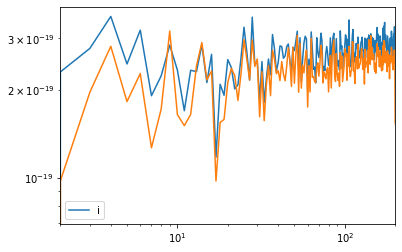

In [20]:
plt.xlim(2,200)
#plt.loglog(tBB/2.726e6**2)
#plt.loglog(tbb)
plt.loglog(iBB,label='i')
plt.loglog(td)
plt.legend()

In [30]:
lens=7
dele=4.68
(1-dele/lens) *100

33.14285714285715